# Ансамбли  бустинг

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor, BaggingRegressor, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss

Загружаем данные

In [12]:
data = pd.read_csv('ensembles-data-1.csv')
data

,feature_1,feature_2,target
0,-2.145869,2.158306,0.0
1,2.714909,-0.868676,0.0
2,-0.343862,-3.026408,0.0
3,-1.632944,-1.165501,0.0
4,1.609181,2.400747,0.0
...,...,...,...
295,-3.738976,-7.269111,2.0
296,-3.555603,-6.795910,2.0
297,-4.177732,-4.145831,2.0
298,-5.392678,-4.826423,2.0


Рассмотрим целевую переменную, какие значения она принимает

In [13]:
data['target'].unique()

array([0., 1., 2.])

- Какую задачу мы решаем?

Визуализируем данные

In [19]:
X = data.iloc[:, :2]
y = data['target']

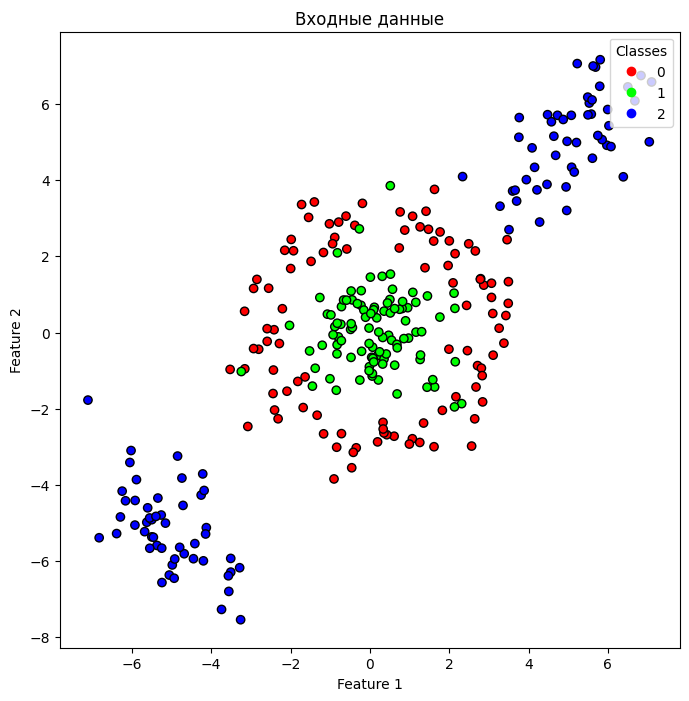

In [21]:
plt.figure(figsize=(8, 8))

cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor="k", cmap=cmap_points)
plt.title('Входные данные')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
plt.show()

- Что такое Bootstrap?
- Что такое ансамбль моделей? Какой может быть базовая модель?
- Что такое бэггинг? Почему вообще мы пришли к бэггингу?
- Что такое метод случайных подпространств?
- Что из себя представляет случайный лес?

Построим дерево решений и рассмотрим оценку по кросс валидации

In [22]:
dt = DecisionTreeClassifier(random_state=42)
print("Decision tree:", cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean())

Decision tree: 0.8966666666666667


Построим бэггинг на деревьях решений

In [23]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)
print("Bagging:", cross_val_score(bagging, X, y, cv=5, scoring='accuracy').mean())

Bagging: 0.93


Построим случайный лес

In [24]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest:", cross_val_score(rfc, X, y, cv=5, scoring='accuracy').mean())

Random Forest: 0.9400000000000001


Мы также можем построить бэггинг и на других моделях. Например, возьмем SVM

In [25]:
bagging_svm = BaggingClassifier(SVC(), n_estimators=100, random_state=42)
print("Bagging:", cross_val_score(bagging_svm, X, y, cv=5, scoring='accuracy').mean())

Bagging: 0.9566666666666667


Теперь посмотрим границы решений для моделей

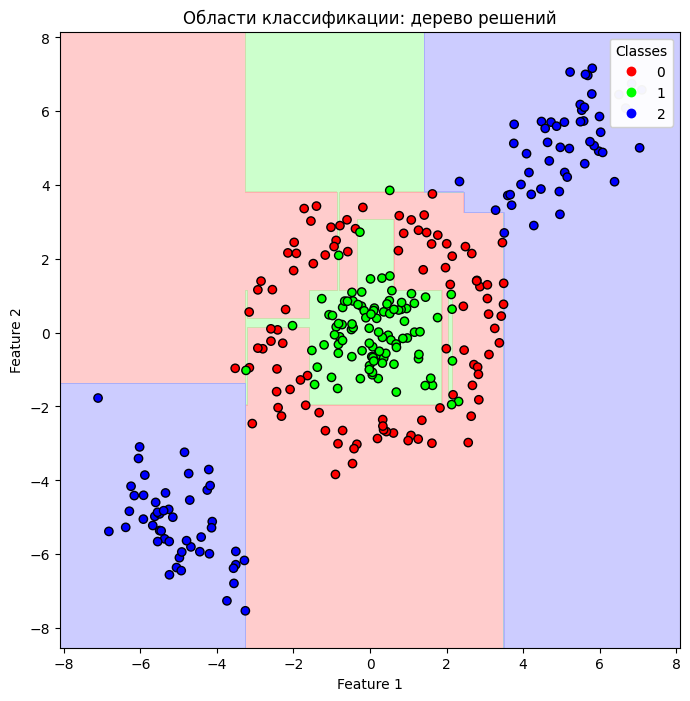

In [32]:
def plot_decision_boundaries(model, X, y, ax=None, title="Decision Boundaries"):
    if ax is None:
        ax = plt.gca()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=cmap_background)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=cmap_points)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.add_artist(legend)

X = X.to_numpy()
plt.figure(figsize=(8, 8))
dt.fit(X, y)
plot_decision_boundaries(dt, X, y)
plt.title("Области классификации: дерево решений")
plt.show()

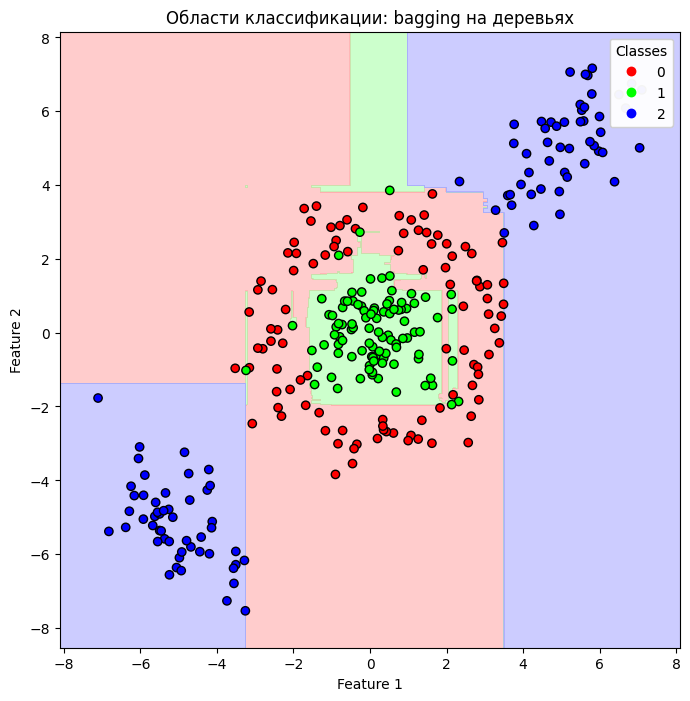

In [34]:
plt.figure(figsize=(8, 8))
bagging.fit(X, y)
plot_decision_boundaries(bagging, X, y)
plt.title("Области классификации: bagging на деревьях")
plt.show()

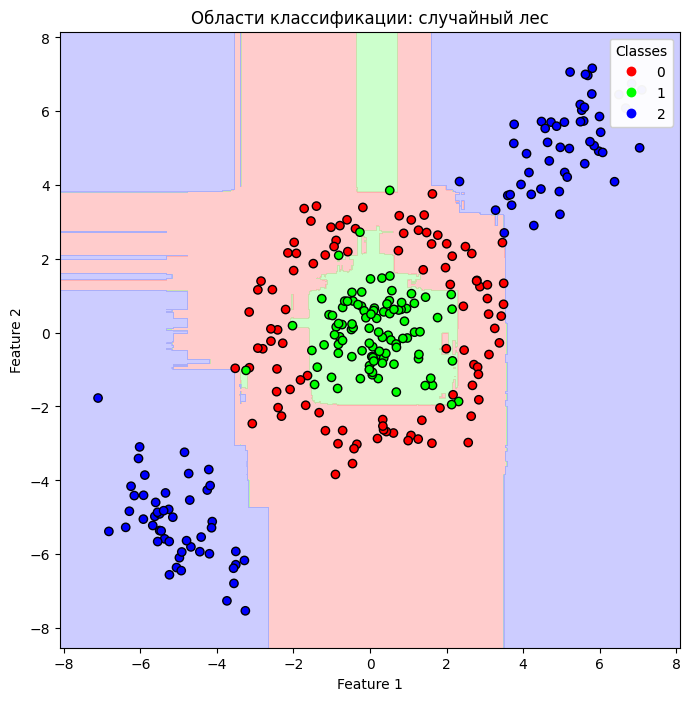

In [33]:
plt.figure(figsize=(8, 8))
rfc.fit(X, y)
plot_decision_boundaries(rfc, X, y)
plt.title("Области классификации: случайный лес")
plt.show()

Рассмотрим задачу классификации рукописных цифр

In [45]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = data.data, data.target
print(X.shape, y.shape)

(1797, 64) (1797,)


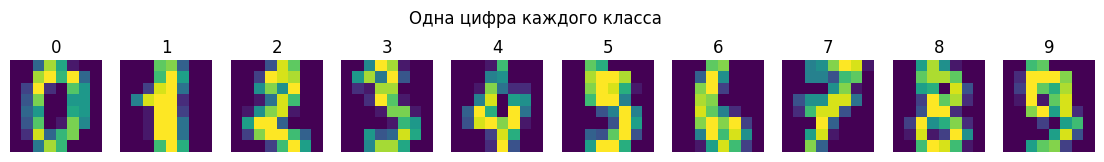

In [52]:
fig, axes = plt.subplots(1, 10, figsize=(14, 2))
for digit in range(10):
    idx = np.where(y == digit)[0][0]
    axes[digit].imshow(digits.images[idx])
    axes[digit].set_title(str(digit))
    axes[digit].axis('off')
plt.suptitle("Одна цифра каждого класса")
plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

- В чем заключается идея градиентного бустинга?

In [55]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

n_estimators_range = range(1, 101)
losses_train = {}
losses_test = {}

In [59]:
print("=== Оценки моделей на тестовой выборке ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        loss = log_loss(y_test, y_proba)
    else:
        # Для некоторых моделей (например, SVM) может не быть predict_proba
        loss = None
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Accuracy: {acc:.4f}")
    if loss is not None:
        print(f"  Log Loss: {loss:.4f}")
    print()

=== Оценки моделей на тестовой выборке ===
Decision Tree:
  Accuracy: 0.8244
  Log Loss: 6.3277

Bagging:
  Accuracy: 0.9244
  Log Loss: 0.3067

Random Forest:
  Accuracy: 0.9600
  Log Loss: 0.3362

Gradient Boosting:
  Accuracy: 0.9578
  Log Loss: 0.1554



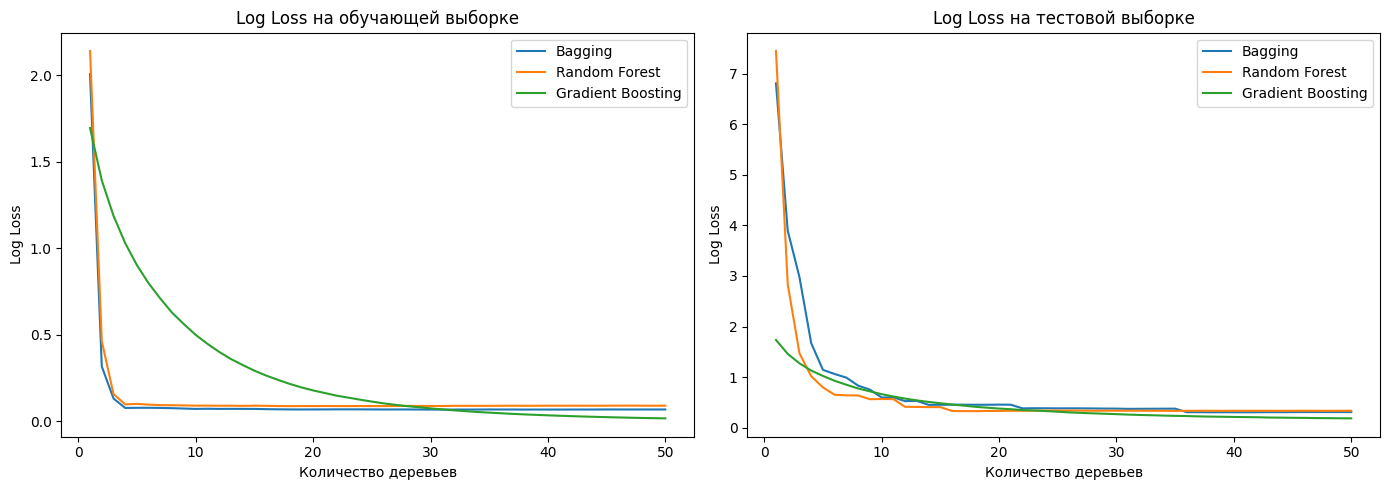

In [64]:
n_estimators_range = range(1, 51)
ensemble_models = {
    "Bagging": BaggingClassifier,
    "Random Forest": RandomForestClassifier,
    "Gradient Boosting": GradientBoostingClassifier
}
losses_train = {}
losses_test = {}

for name, cls in ensemble_models.items():
    losses_train[name] = []
    losses_test[name] = []
    for n in n_estimators_range:
        model = cls(n_estimators=n, random_state=42)
        model.fit(X_train, y_train)
        y_proba_train = model.predict_proba(X_train)
        y_proba_test = model.predict_proba(X_test)
        loss_train = log_loss(y_train, y_proba_train)
        loss_test = log_loss(y_test, y_proba_test)
        losses_train[name].append(loss_train)
        losses_test[name].append(loss_test)

# Графики
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for name in ensemble_models.keys():
    ax[0].plot(n_estimators_range, losses_train[name], label=name)
    ax[1].plot(n_estimators_range, losses_test[name], label=name)

ax[0].set_title("Log Loss на обучающей выборке")
ax[0].set_xlabel("Количество деревьев")
ax[0].set_ylabel("Log Loss")
ax[0].legend()

ax[1].set_title("Log Loss на тестовой выборке")
ax[1].set_xlabel("Количество деревьев")
ax[1].set_ylabel("Log Loss")
ax[1].legend()

plt.tight_layout()
plt.show()

Теперь для модели случайного леса подберем наилучшие параметры по сетке

In [63]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20, 30]
}

In [67]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf, param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [68]:
print("Лучшие параметры:")
print(grid_search.best_params_)
print(f"Лучшая cross-val accuracy: {grid_search.best_score_:.4f}")

Лучшие параметры:
{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 150}
Лучшая cross-val accuracy: 0.9762


In [69]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)
acc = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_proba)
print(f"Accuracy на тесте: {acc:.4f}")
print(f"Log Loss на тесте: {loss:.4f}")

Accuracy на тесте: 0.9644
Log Loss на тесте: 0.3607


Рассмотрим, переобучаются ли ансамблевые модели на примере бэггинга

In [71]:
for max_depth in [None, 5, 10]:
    for n_estimators in [10, 40, 100, 200, 600, 1000]:
        clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=max_depth), n_estimators=n_estimators, n_jobs=4)
        clf = clf.fit(X_train, y_train)
        train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
        print('n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc))

n_estimators =   10 train_acc = 0.9977728285077951 test_acc = 0.9177777777777778
n_estimators =   40 train_acc =  1.0 test_acc = 0.9222222222222223
n_estimators =  100 train_acc =  1.0 test_acc = 0.9244444444444444
n_estimators =  200 train_acc =  1.0 test_acc = 0.9333333333333333
n_estimators =  600 train_acc =  1.0 test_acc = 0.9288888888888889
n_estimators = 1000 train_acc =  1.0 test_acc = 0.9333333333333333
n_estimators =   10 train_acc = 0.9168522642910171 test_acc = 0.8444444444444444
n_estimators =   40 train_acc = 0.9020044543429844 test_acc = 0.8333333333333334
n_estimators =  100 train_acc = 0.9123979213066072 test_acc = 0.8444444444444444
n_estimators =  200 train_acc = 0.9123979213066072 test_acc = 0.8355555555555556
n_estimators =  600 train_acc = 0.910913140311804 test_acc = 0.8466666666666667
n_estimators = 1000 train_acc = 0.9116555308092057 test_acc = 0.8444444444444444
n_estimators =   10 train_acc = 0.9955456570155902 test_acc = 0.9022222222222223
n_estimators =   4

Рассмотрим популярные модели бустинга

In [75]:
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

models = {
    "LightGBM": lgb.LGBMClassifier(random_state=42, verbose=-1),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}

In [76]:
print("=== Оценки моделей на тестовой выборке ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, y_proba)
    print(f"{name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Log Loss: {loss:.4f}\n")

=== Оценки моделей на тестовой выборке ===
LightGBM:
  Accuracy: 0.9600
  Log Loss: 0.1644



/home/bzzdwn/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:08:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
  Accuracy: 0.9533
  Log Loss: 0.1728

CatBoost:
  Accuracy: 0.9778
  Log Loss: 0.0881



Рассмотрим важность признаков

In [77]:
from sklearn.datasets import load_wine

data = load_wine()
X, y = data.data, data.target
feature_names = data.feature_names

In [78]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

RandomForestClassifier(random_state=42)

In [79]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

In [80]:
print("Feature importances (sorted):")
for idx in indices:
    print(f"{feature_names[idx]:<25} {importances[idx]:.4f}")

Feature importances (sorted):
flavanoids                0.1945
color_intensity           0.1730
alcohol                   0.1416
proline                   0.1370
od280/od315_of_diluted_wines 0.1118
hue                       0.0769
total_phenols             0.0351
malic_acid                0.0331
alcalinity_of_ash         0.0299
magnesium                 0.0259
proanthocyanins           0.0184
ash                       0.0155
nonflavanoid_phenols      0.0073


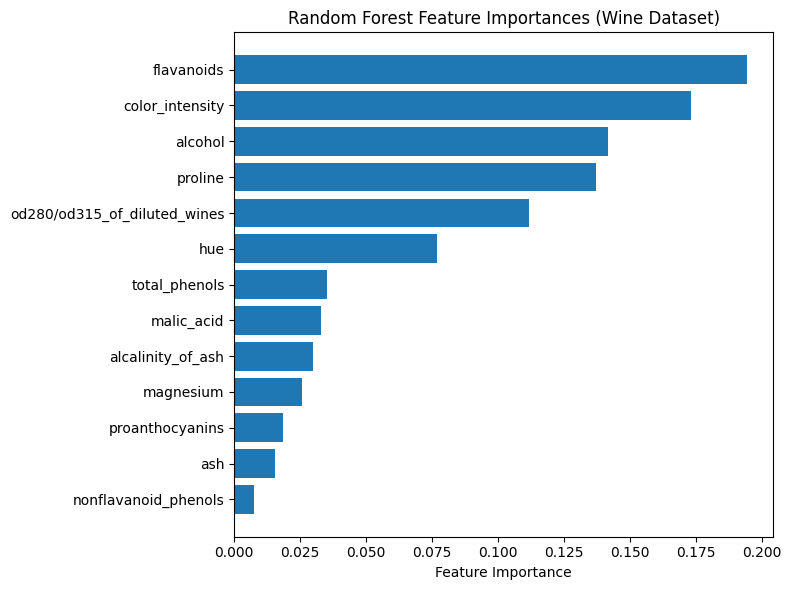

In [81]:
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_names)), importances[indices], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances (Wine Dataset)")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()